In [38]:
import pandas as pd
import matplotlib.pyplot as plt
# Dependencies
import requests
from pprint import pprint
import numpy as np
import gmaps
import json
import os
from scipy.stats import linregress
from datetime import datetime
import time

# Google developer API key
#from config import g_key

In [39]:
deforest_df = pd.read_csv("csv_files/clean_defostation_data.csv")
tot_rainfall_df=pd.read_csv('csv_files/total_rainfall_by_year_by_state.csv')

#deforest_df=deforest_df.drop("Grand Total", axis =1)
deforest_df

,Year,AC,AP,AM,MA,MT,PA,RO,RR,TO,Grand Total
0,1988,620,60,151,245,514,699,234,290,165,2978
1,1989,540,130,118,142,596,575,143,630,730,3604
2,1990,550,250,520,11,402,489,167,150,580,3119
3,1991,380,410,980,670,284,378,111,420,440,4073
4,1992,400,36,799,1135,4674,3787,2265,281,409,13786
5,1993,482,0,370,372,622,4284,2595,240,333,9298
6,1994,482,0,370,372,622,4284,2595,240,333,9298
7,1995,1208,9,2114,1745,10391,7845,473,220,797,24802
8,1996,433,0,1023,1061,6543,6135,2432,214,320,18161
9,1997,358,18,589,409,5271,4139,1986,184,273,13227


In [43]:
tot_rain=tot_rainfall_df.drop(["Unnamed: 0"], axis =1)
tot_rain

,Year,State,rain_sum
0,1988,AC,5417.1
1,1988,AM,33166.5
2,1988,AP,2591.0
3,1988,MA,22515.7
4,1988,MT,8386.0
...,...,...,...
245,2019,MA,18511.0
246,2019,MT,10168.8
247,2019,PA,36037.8
248,2019,RR,4392.3


In [55]:
trp=tot_rain.pivot_table(values="rain_sum", index="Year", columns="State")
trp=trp.fillna(0)

In [56]:
trp["tot_rain_mm"]= trp.AC+trp.AM+trp.AP+trp.MA+trp.MT+trp.PA+trp.RR+trp.TO
trp

State,AC,AM,AP,MA,MT,PA,RR,TO,tot_rain_mm
Year,,,,,,,,,
1988,5417.1,33166.5,2591.0,22515.7,8386.0,38820.3,1015.0,8636.5,120548.1
1989,4690.2,31231.1,2925.7,22163.2,7969.6,35532.8,933.8,9797.0,115243.4
1990,5794.4,19381.8,2762.2,15311.1,4851.3,28873.7,0.0,5074.4,82048.9
1991,0.0,2138.0,2404.8,18156.7,1601.5,33074.9,0.0,5237.7,62613.6
1992,0.0,1950.2,2202.7,13418.5,3072.2,22278.0,0.0,6248.1,49169.7
1993,5205.9,36970.2,2291.9,16273.5,2448.4,29360.2,1452.8,3974.0,97976.9
1994,6976.2,36555.8,2645.7,21906.4,3918.5,35171.6,2367.8,3524.7,113066.7
1995,5910.5,33687.9,2608.2,20736.6,10854.4,34407.0,2615.5,9921.1,120741.2
1996,6140.6,36907.2,2589.7,21625.6,0.0,33019.7,4380.7,8563.6,113227.1


In [48]:
new_df=deforest_df.set_index("Year")
new_df

,AC,AP,AM,MA,MT,PA,RO,RR,TO,Grand Total
Year,,,,,,,,,,
1988,620,60,151,245,514,699,234,290,165,2978
1989,540,130,118,142,596,575,143,630,730,3604
1990,550,250,520,11,402,489,167,150,580,3119
1991,380,410,980,670,284,378,111,420,440,4073
1992,400,36,799,1135,4674,3787,2265,281,409,13786
1993,482,0,370,372,622,4284,2595,240,333,9298
1994,482,0,370,372,622,4284,2595,240,333,9298
1995,1208,9,2114,1745,10391,7845,473,220,797,24802
1996,433,0,1023,1061,6543,6135,2432,214,320,18161


In [77]:
#fig, axes = plt.subplots(nrows=9,ncols=1, figsize=(15,15))
states1=["ACRE", "AP","AM","MA","MT","PA", "RO", "RR", "TO"]
states2=[' AC', ' AP'," AM"," MA"," MT"," PA"," RO"," RR"," TO"]
count=0
for j in range(1):
    for i in range(9):
        #ax=axes[i]
        x1=deforest_df["Years"].unique().tolist()
        #print(len(x1))
        y1=(deforest_df[states1[i]]).tolist()
        count+=1
        #print(len(y1))
        x2=ave_rain_df["Year"].unique().tolist()
        print(f"rain x: {len(x2)}")
        y2=(ave_rain_df.loc[ave_rain_df["State"]==states2[i]]["Precipitation"]).tolist()
        print(f"rain y: {states2[i]}: {len(y2)}")
        #ax2=ax.twinx()
        #ax.plot(x1,y1,'r')
        #ax.set_xlabel("Year")
        #ax.set_ylabel("Deforestation (km^2)")
        #ax2.plot(x2,y2,'g')
        #ax2.set_ylabel("Precipitation (mm)")
        #plt.tight_layout()
        #plt.show()
        
#get correct years/number of years data was recorded for each state. 

rain x: 32
rain y:  AC: 30
rain x: 32
rain y:  AP: 32
rain x: 32
rain y:  AM: 32
rain x: 32
rain y:  MA: 32
rain x: 32
rain y:  MT: 31
rain x: 32
rain y:  PA: 32
rain x: 32
rain y:  RO: 0
rain x: 32
rain y:  RR: 29
rain x: 32
rain y:  TO: 32


<Figure size 432x288 with 0 Axes>

In [51]:
new_df=deforest_df.set_index("Years")
new_df

,ACRE,AP,AM,MA,MT,PA,RO,RR,TO,Grand Total
Years,,,,,,,,,,
1988,620,60,151,245,514,699,234,290,165,2978
1989,540,130,118,142,596,575,143,630,730,3604
1990,550,250,520,11,402,489,167,150,580,3119
1991,380,410,980,670,284,378,111,420,440,4073
1992,400,36,799,1135,4674,3787,2265,281,409,13786
1993,482,0,370,372,622,4284,2595,240,333,9298
1994,482,0,370,372,622,4284,2595,240,333,9298
1995,1208,9,2114,1745,10391,7845,473,220,797,24802
1996,433,0,1023,1061,6543,6135,2432,214,320,18161


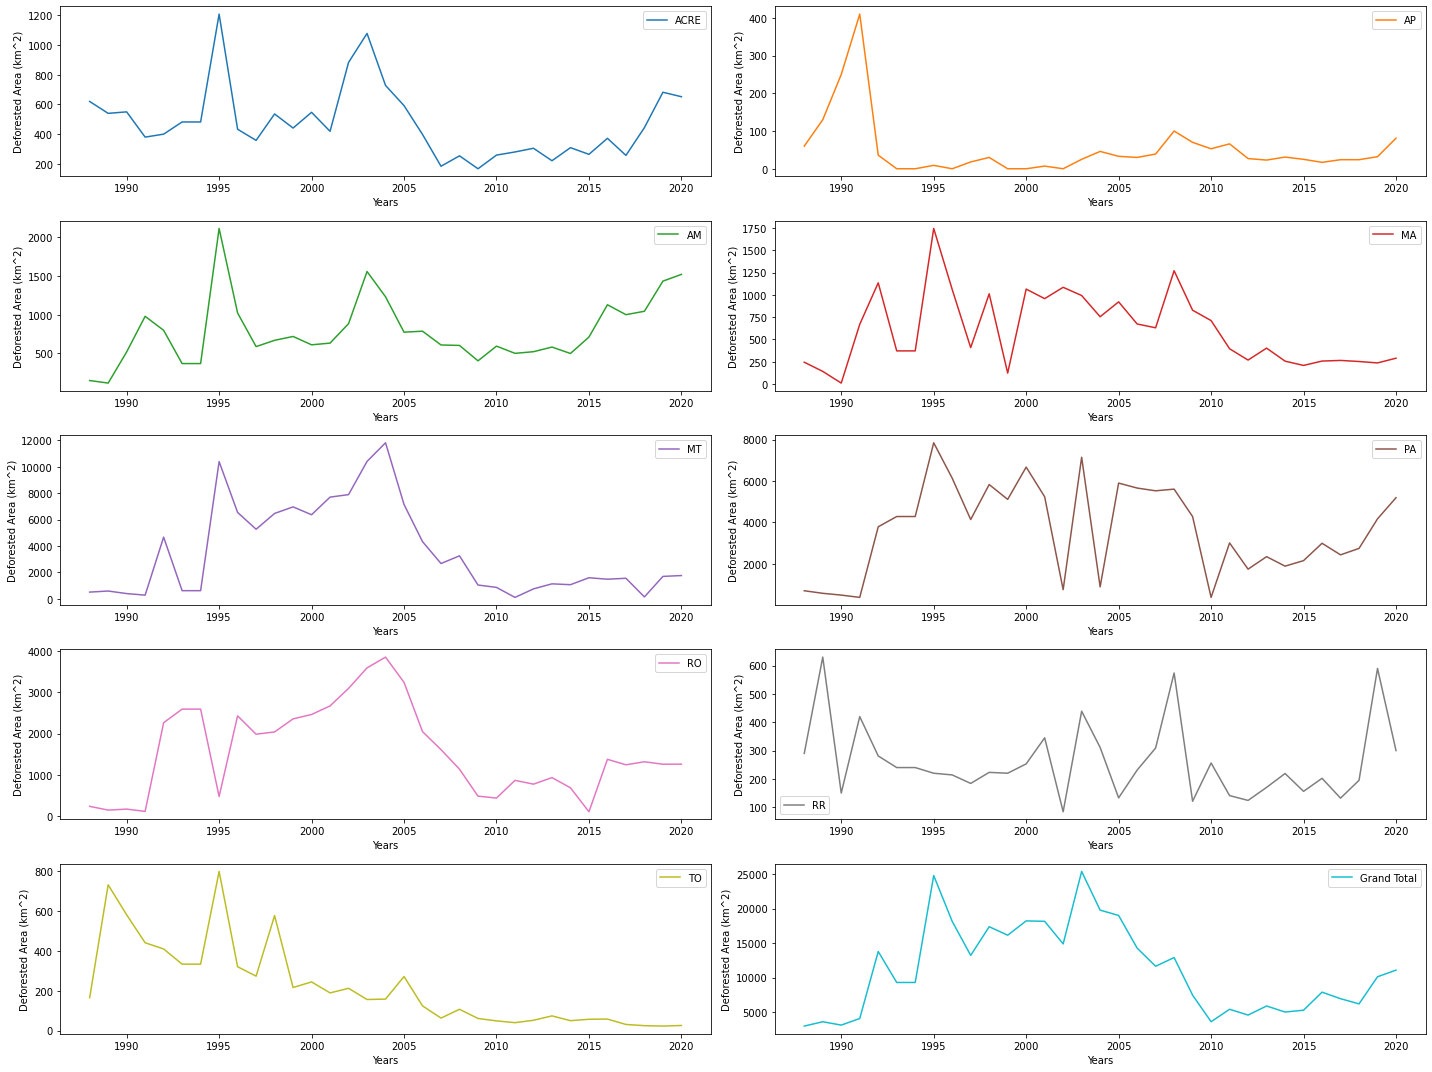

In [52]:
new_df.plot(sharex=False,subplots=True,layout=(5,2),figsize=(20,15),ylabel="Deforested Area (km^2)")
plt.tight_layout()
plt.show()

In [ ]:
ax=ave_rainfall_df.pivot(index='Year',columns="State",values="Precipitation")
ax.plot(kind="line",ylabel="Precipitation (mm)",figsize=(25,10),title="Precipitation for Brazilian States from 1988 to 2019")
plt.show()